<a href="https://colab.research.google.com/github/ElzodQurashev/DS-AI_praktikum/blob/main/Aviachipta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aviachipta narxlarini bashorat qilish**

* Model     -- 'Supervised'
* Algoritm  -- 'Regressiya'

In [ ]:
# kerakli kutibxonalar
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from math import sqrt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [ ]:
!unzip '/content/aviachipta-narxini-bashorat-qilish.zip'

Archive:  /content/aviachipta-narxini-bashorat-qilish.zip
  inflating: sample_solution.csv     
  inflating: test_data.csv           
  inflating: train_data.csv          


In [ ]:
test = pd.read_csv('test_data.csv')
train = pd.read_csv('train_data.csv')
train.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [ ]:
print(train.shape)
print(test.shape)

(20000, 12)
(5000, 11)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5000 non-null   int64  
 1   airline           5000 non-null   object 
 2   flight            5000 non-null   object 
 3   source_city       5000 non-null   object 
 4   departure_time    5000 non-null   object 
 5   stops             5000 non-null   object 
 6   arrival_time      5000 non-null   object 
 7   destination_city  5000 non-null   object 
 8   class             5000 non-null   object 
 9   duration          5000 non-null   float64
 10  days_left         5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


In [ ]:
train.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


Catigorical ustunlarga, munosib yechimni topish uchun ularning xilma-xilligi qanday ekanligini ko'rib chiqamiz

In [ ]:
train['airline'].value_counts()

Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: airline, dtype: int64

In [ ]:
train['flight'].value_counts()

UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: flight, Length: 1310, dtype: int64

In [ ]:
train['source_city'].value_counts()

Mumbai       4068
Delhi        4022
Bangalore    3486
Kolkata      3092
Hyderabad    2748
Chennai      2584
Name: source_city, dtype: int64

In [ ]:
train['departure_time'].value_counts()

Morning          4738
Early_Morning    4432
Evening          4341
Night            3231
Afternoon        3166
Late_Night         92
Name: departure_time, dtype: int64

In [ ]:
train['stops'].value_counts()

one            16666
zero            2440
two_or_more      894
Name: stops, dtype: int64

In [ ]:
train['arrival_time'].value_counts()

Night            6142
Evening          5316
Morning          4086
Afternoon        2536
Early_Morning    1004
Late_Night        916
Name: arrival_time, dtype: int64

In [ ]:
train['destination_city'].value_counts()

Mumbai       3918
Delhi        3825
Bangalore    3425
Kolkata      3323
Hyderabad    2814
Chennai      2695
Name: destination_city, dtype: int64

In [ ]:
train['class'].value_counts()

Economy     13753
Business     6247
Name: class, dtype: int64

## **Vizualizatsiya**

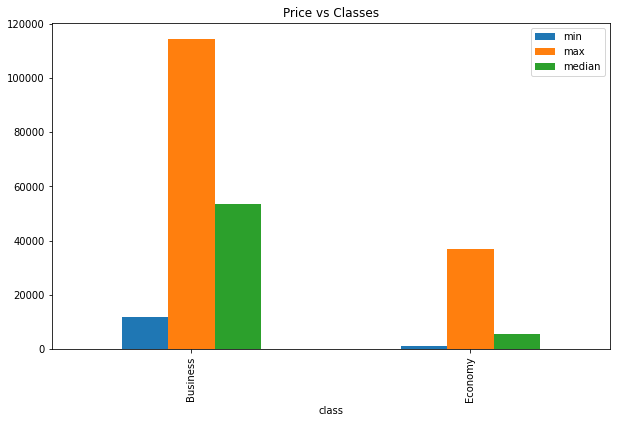

In [ ]:
cl = train.groupby('class').price.agg([min, max, np.median])
cl.plot(kind='bar', figsize=(10,6))
plt.title('Price vs Classes')
plt.show()

In [ ]:
# xclass = train.groupby('class')[['price']].mean().sort_values(by='price', ascending=False)

# sns.barplot(x=xclass.index, y=xclass['price'])
# plt.title("Classlar orasidagi o'rtacha narx farqi")
# plt.show()

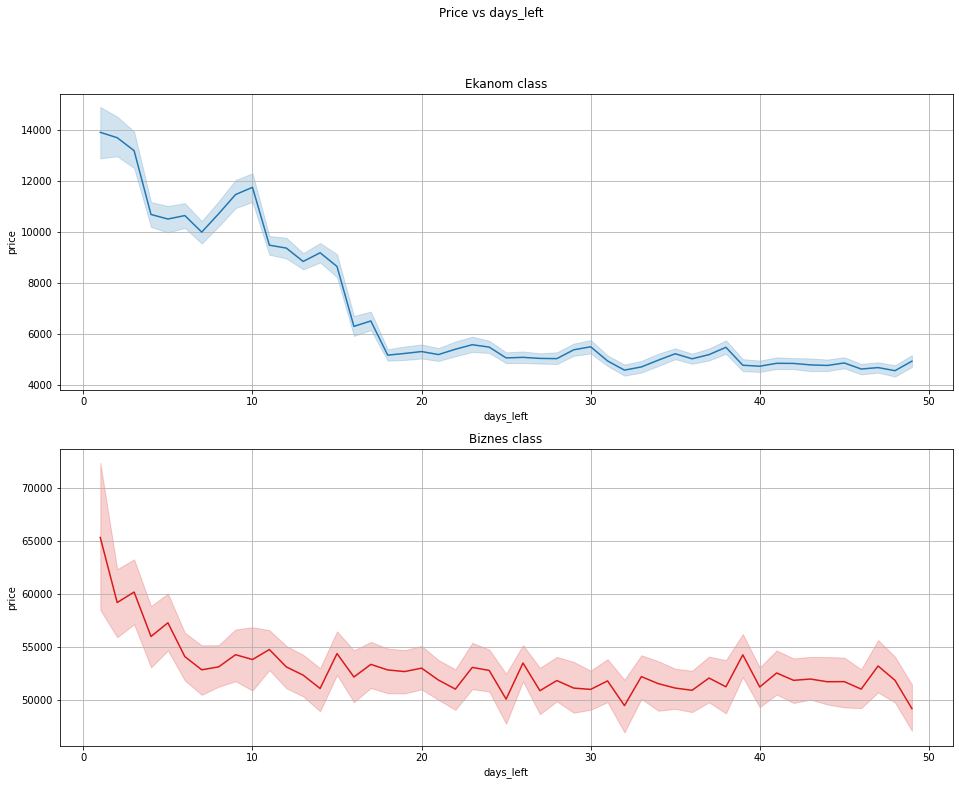

In [ ]:
econom = train[train['class']=='Economy']
biznes = train[train['class']=='Business']

fig, ax = plt.subplots(2,1, figsize=(16,12))

plt.suptitle('Price vs days_left')
sns.lineplot(ax=ax[0], data=econom, x='days_left', y='price').grid()
sns.lineplot(ax=ax[1], data=biznes, x='days_left', y='price', color='#db1818').grid()

ax[0].set_title("Ekanom class")
ax[1].set_title("Biznes class")

plt.show()

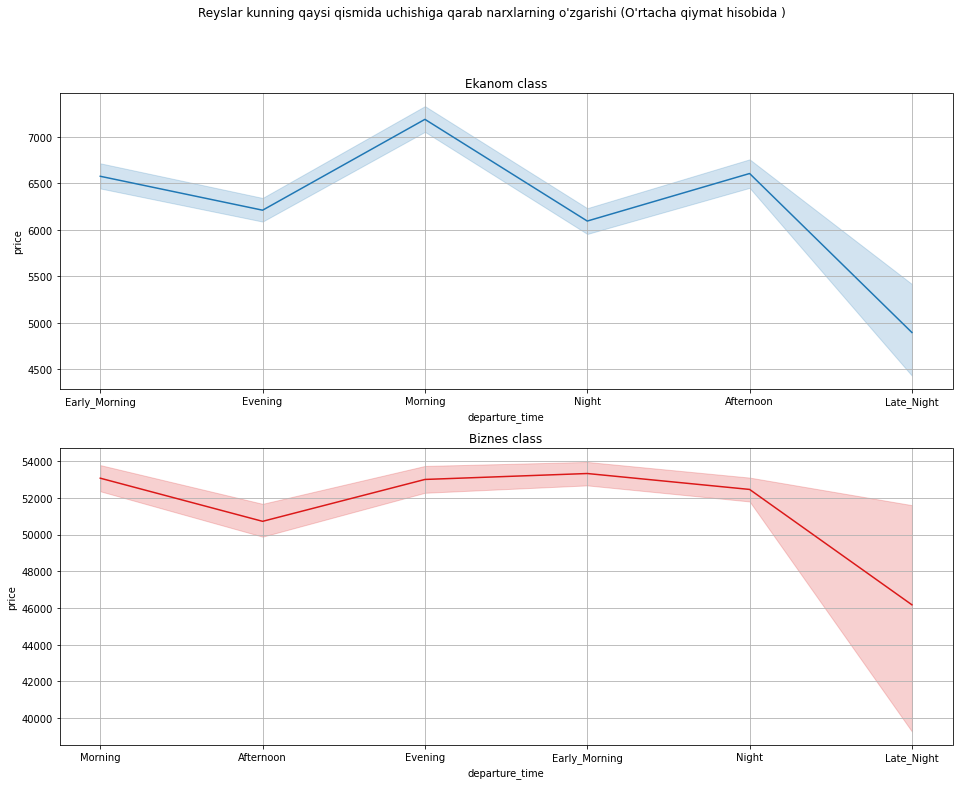

In [ ]:
econom = train[train['class']=='Economy']
biznes = train[train['class']=='Business']

fig, ax = plt.subplots(2,1, figsize=(16,12))
fig.suptitle('Reyslar kunning qaysi qismida uchishiga qarab narxlarning o\'zgarishi (O\'rtacha qiymat hisobida )')

sns.lineplot(ax=ax[0], y=econom['price'], x=econom['departure_time']).grid()
sns.lineplot(ax=ax[1], y=biznes['price'], x=biznes['departure_time'], color='#db1818').grid()

ax[0].set_title("Ekanom class")
ax[1].set_title("Biznes class")

plt.show()

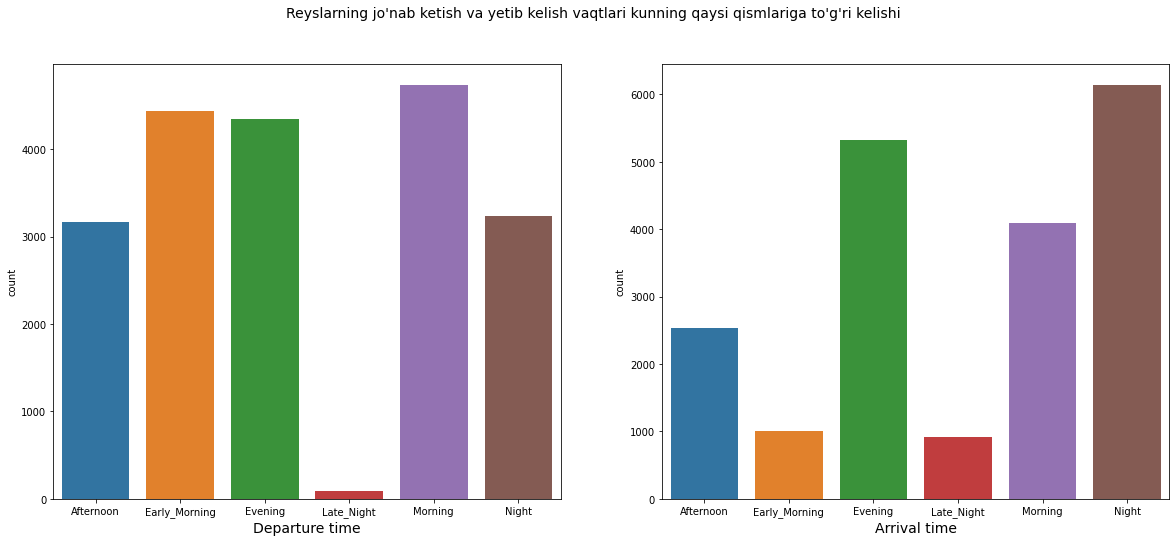

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

sns.countplot(ax=ax[0], x=train['departure_time'].sort_values())
sns.countplot(ax=ax[1], x=train['arrival_time'].sort_values())

plt.suptitle("Reyslarning jo'nab ketish va yetib kelish vaqtlari kunning qaysi qismlariga to'g'ri kelishi", fontsize = 14)
ax[0].set_xlabel("Departure time", fontsize=14)
ax[1].set_xlabel("Arrival time", fontsize=14)

plt.show()

In [ ]:
# sns.set(rc={"figure.figsize":(16, 12)})
# sns.catplot(data=train, x='departure_time', y='price', kind='swarm', hue='stops')
# plt.show()

# train_test_split

In [ ]:
x = train.drop(['flight', 'price'], axis=1)
y = train[['price']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=19)

print("X_train shape =", X_train.shape)
print("y_train shape =", y_train.shape)
print('-'*40)
print("X_test shape =", X_test.shape)
print("y_test shape =", y_test.shape)

X_train shape = (18000, 10)
y_train shape = (18000, 1)
----------------------------------------
X_test shape = (2000, 10)
y_test shape = (2000, 1)


## Pipeline

In [ ]:
# num pipeline
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

# full Pipeline
cats = ['airline', 	'source_city',	'departure_time',	'stops',	'arrival_time',	'destination_city',	'class']
nums = ['duration',	'days_left']

full_pipeline = ColumnTransformer([
                      ('num', num_pipeline, nums),
                      ('cat', OneHotEncoder(), cats)
                      ])

In [ ]:
X_train_prepared = full_pipeline.fit_transform(X_train).toarray()
X_test_prepared = full_pipeline.fit_transform(X_test).toarray()

## LinearRegression

In [ ]:
LR_model = LinearRegression().fit(X_train_prepared, y_train)

In [ ]:
y_predicted =  LR_model.predict(X_train_prepared)

print(mae(y_train, y_predicted))
print(sqrt(mse(y_train, y_predicted)))

4545.3175833333335
6699.825251793471


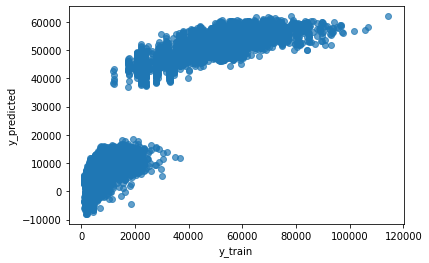

In [ ]:
plt.scatter(y_train, y_predicted, alpha=0.7)
plt.xlabel('y_train')
plt.ylabel('y_predicted')
plt.show()

In [ ]:
y_test_predicted =  LR_model.predict(X_test_prepared)

print(mae(y_test, y_test_predicted))
print(sqrt(mse(y_test, y_test_predicted)))

4572.77025
6802.557156531285


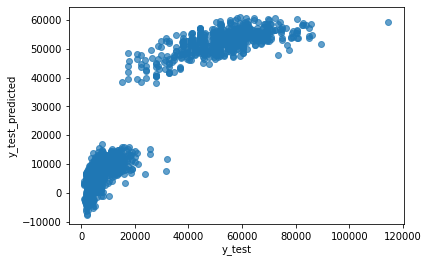

In [ ]:
plt.scatter(y_test, y_test_predicted, alpha=0.7)
plt.xlabel('y_test')
plt.ylabel('y_test_predicted')
plt.show()

## RandomForestRegressor

In [ ]:
RF_model = RandomForestRegressor(n_estimators=150).fit(X_train_prepared, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
y_predicted = RF_model.predict(X_train_prepared)

print(mae(y_train, y_predicted))
print(sqrt(mse(y_train, y_predicted)))

725.5651193024692
1430.62901534108


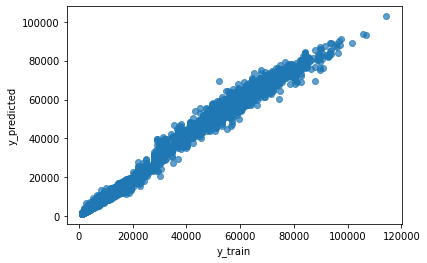

In [ ]:
plt.scatter(y_train, y_predicted, alpha=0.7)
plt.xlabel('y_train')
plt.ylabel('y_predicted')
plt.show()

In [ ]:
y_test_predicted = RF_model.predict(X_test_prepared)

print(mae(y_test, y_test_predicted))
print(sqrt(mse(y_test, y_test_predicted)))

2249.7766827460314
4108.370673729052


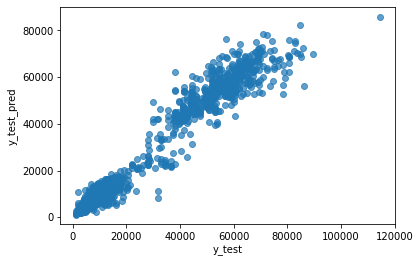

In [ ]:
plt.scatter(y_test, y_test_predicted, alpha=0.7)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

## DecisionTree

In [ ]:
Tree = DecisionTreeRegressor().fit(X_train_prepared, y_train)

In [ ]:
y_predicted = Tree.predict(X_train_prepared)

print(mae(y_train, y_predicted))
print(sqrt(mse(y_train, y_predicted)))

6.553833333333333
251.4672465418376


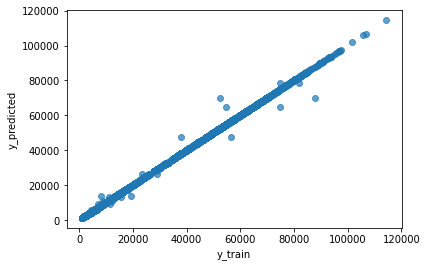

In [ ]:
plt.scatter(y_train, y_predicted, alpha=0.7)
plt.xlabel('y_train')
plt.ylabel('y_predicted')
plt.show()

In [ ]:
y_test_predicted = Tree.predict(X_test_prepared)

print(mae(y_test, y_test_predicted))

print(sqrt(mse(y_test, y_test_predicted)))

2571.9895
5290.891364292977


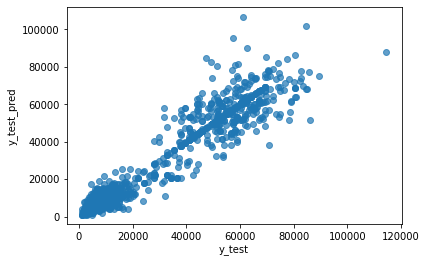

In [ ]:
plt.scatter(y_test, y_test_predicted, alpha=0.7)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

# Final prediction
* RF_model

In [ ]:
final_test = test.drop('flight', axis=1)

In [ ]:
final_test_prep = full_pipeline.fit_transform(final_test)

In [ ]:
id = test.id
prediction = RF_model.predict(final_test_prep)

In [ ]:
submission = pd.DataFrame({
        "id" : id,
        "price" : prediction
  })
submission.to_csv("RF_model.csv", index=False)
submission.()

,id,price
0,1,52520.520000
1,2,55495.060000
2,3,23199.746667
3,4,2818.486667
4,5,5651.300000


In [ ]:
print("max",submission.price.max())
print("min",submission.price.min())
print("mean",submission.price.mean())

max 86495.97333333333
min 1113.92
mean 20631.444156730162
